# Visualizing Earning Based on College Majors

In this project, I will be exploring a datset on the job outcomes of students who graduated from college between 2010 and 2012. The original data was collected from outcomes released by the American Community Survey. I want to visualize trends that come about in this dataset. This project is part of the Exploratory Data Visualization Dataquest Course. 

## Data Dictionary 

| Title       | Description |
| ----------- | ----------- |
| Rank      | Rank by median earnings       |
| Major_code   | Major Code        |
| Major | Major description |
| Major_category | Category of the major |
| Total |Total number of people with major |
| Sample_size | Sample size (unweighted) of full-time |
| Men | Number of Male graduates |
| Women | Number of Female graduates |
| ShareWomen | Women as share of total |
| Employed | Number of students employed |
| Median | Median salary of full-time, year-round workers |
| Low_wage_jobs | Number of students in low wage service jobs |
| Full_time | Number of students employed 35 hours or more |
| Part_time | Number of students employed less than 35 hours |

## Initial Dataset Setup

In [1]:
#import libraries needed for project
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read file and exploring
recent_grads = pd.read_csv('recent-grads.csv')

print(recent_grads.head(2))
print(recent_grads.tail(2))
recent_grads.describe()


   Rank  Major_code                           Major   Total     Men  Women  \
0     1        2419           PETROLEUM ENGINEERING  2339.0  2057.0  282.0   
1     2        2416  MINING AND MINERAL ENGINEERING   756.0   679.0   77.0   

  Major_category  ShareWomen  Sample_size  Employed      ...        Part_time  \
0    Engineering    0.120564           36      1976      ...              270   
1    Engineering    0.101852            7       640      ...              170   

   Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th   P75th  \
0                  1207          37           0.018381  110000  95000  125000   
1                   388          85           0.117241   75000  55000   90000   

   College_jobs  Non_college_jobs  Low_wage_jobs  
0          1534               364            193  
1           350               257             50  

[2 rows x 21 columns]
     Rank  Major_code                  Major   Total    Men   Women  \
171   172        5203  COUNSEL

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Deal with Missing Values

In [3]:
#print the first row in tabluar format
print(recent_grads.iloc[0])

#assign the number of rows to the variable raw_data_count
raw_data_count = 173

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [4]:
#Use df.dropna to drop rows with missing values
recent_grads = recent_grads.dropna()

In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
#Assign the number of rows in recent_grads to cleaned_data_count
cleaned_data_count = 172

One row contained missing values and was dropped from the dataset. Now that the dataset is cleaned of missing values, I can begin exploring the data through visualizations. 

# Exploring the Data with Scatterplots

Each row in this dataset is a unique major in college and has information such as *Sample Size, Employment and Unemployment Rate, and Men and Women Breakdown.* First, I will create a scatterplot of *Sample Size* and *Median Salary.* *Sample_Size* is the sample size of full-time workers. *Median Salary* is the median salary of full-time, year round workers. 

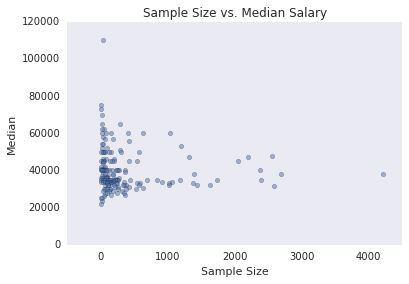

In [7]:
#Create scatterplot of Sample Size versus Median Salary
ax = recent_grads.plot(x="Sample_size", 
                       y="Median",
                       kind="scatter",
                       title="Sample Size vs. Median Salary", 
                       alpha=0.5)

#set x-axis label and limit
ax.set_xlabel("Sample Size")
ax.set_xlim(-500,4500)

#hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#hide gridline
ax.grid(False)

Based on this scatter plot, we can see that most majors have graduates that have a median salary between $25,000 and a bit above $40,000. 

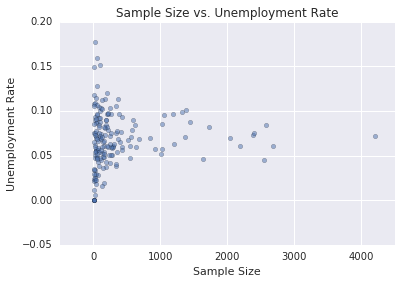

In [8]:
#Create the Sample Size vs. Unemployment Rate scatterplot
ax = recent_grads.plot(x='Sample_size', 
                       y='Unemployment_rate', 
                       kind='scatter',
                       title='Sample Size vs. Unemployment Rate', 
                       alpha=0.5)

#set the x and y axis labels and axis limits
ax.set_xlabel('Sample Size')
ax.set_ylabel('Unemployment Rate')
ax.set_xlim(-500,4500)

#hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Looking at this scatterplot, I see that most majors have an unemployment rate between 0.04 and 0.10.

Next, I will create a scatterplot of the number of students employed in a full-time job and their median salary.

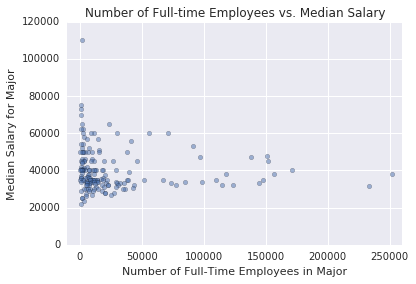

In [9]:
#Create Full Time Employees vs. Median Salary scatterplot
ax = recent_grads.plot(x='Full_time', 
                       y='Median', 
                       kind='scatter',
                       title='Number of Full-time Employees vs. Median Salary',
                       alpha=0.5)

#set the x and y-axis labels and limits
ax.set_xlabel('Number of Full-Time Employees in Major')
ax.set_ylabel('Median Salary for Major')
ax.set_xlim(-10000, 260000)

#hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The scatterplot aboves indicates that most majors have a median salary around $35,000 to $40,000. 

Next, I will create a scatterplot of *ShareWomen,* which is the share of women out of the total number of students in the major versus the unemployment rate. 

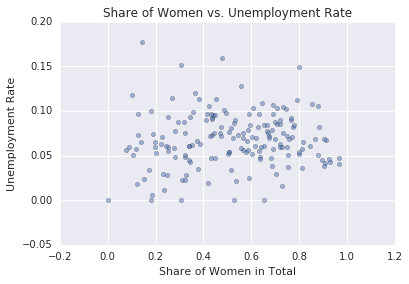

In [10]:
#Create Share of Women of Total vs. Unemployment Rate Scatterplot
ax = recent_grads.plot(x='ShareWomen', 
                       y='Unemployment_rate', 
                       kind='scatter',
                       title='Share of Women vs. Unemployment Rate',
                       alpha=0.5)

#set the x and y-axis labels
ax.set_xlabel('Share of Women in Total')
ax.set_ylabel('Unemployment Rate')

#Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Students that majored in majors that are majority women have unemployment rate between 0.00 and 0.10. There is no clear correlation between the Share of Women in the major and the post-graduate unemployment rate.

Next, I will compare the number of men in the major and the major's median salary.

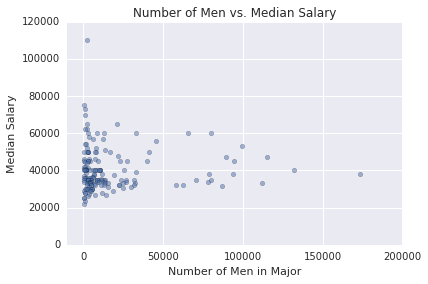

In [11]:
#Create Number of Men vs. Median Salary Scatterplot
ax = recent_grads.plot(x='Men', 
                       y='Median', 
                       kind='scatter',
                       title='Number of Men vs. Median Salary',
                       alpha=0.5)

#set x and y-axis labels and limits
ax.set_xlabel('Number of Men in Major')
ax.set_ylabel('Median Salary')
ax.set_xlim(-10000,200000)

#hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

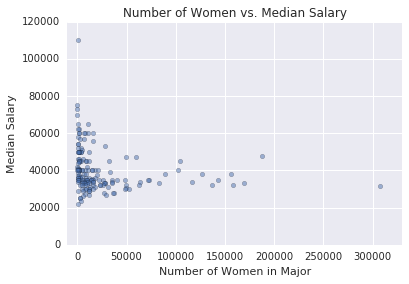

In [12]:
#Number of Women and Median Salary
ax = recent_grads.plot(x='Women', 
                       y='Median', 
                       kind='scatter',
                       title='Number of Women vs. Median Salary',
                       alpha=0.5)

#set the x and y-axis labels and limits
ax.set_xlabel('Number of Women in Major')
ax.set_ylabel('Median Salary')
ax.set_xlim(-10000,330000)

#hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Most majors have a median salary between $30,000 and $45,000. This does not change as the number of women in the major increases.

# Exploring Recent Grad Data with Histograms

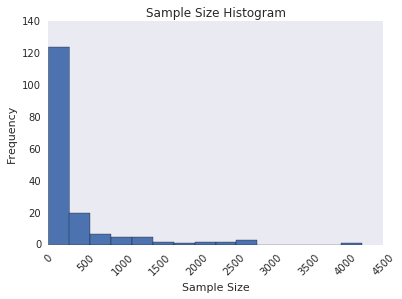

In [13]:
#set style of the histogram
sns.set_style('dark')

#Create the Sample Size Histogram 
ax = recent_grads['Sample_size'].hist(bins=15,
                                     xrot=45)

#set axis labels and graph title
ax.set_xlabel('Sample Size')
ax.set_ylabel('Frequency')
ax.set_title('Sample Size Histogram')

#remove gridlines
ax.grid(False)


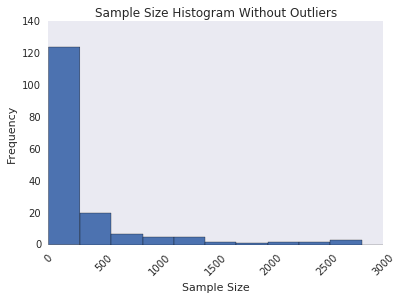

In [14]:
#Create a histogram without the outlier
ax = recent_grads['Sample_size'].hist(bins=15,
                                      xrot=45)

#set axis labels, graph title, and xlim
ax.set_xlabel('Sample Size')
ax.set_ylabel('Frequency')
ax.set_title('Sample Size Histogram Without Outliers')
ax.set_xlim(0,3000)

#remove gridlines
ax.grid(False)

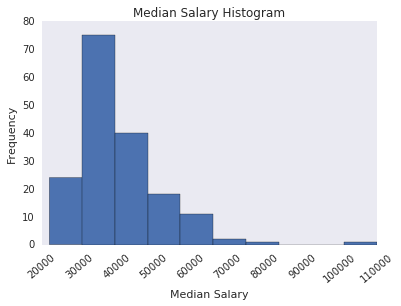

In [15]:
#Create the Median Salary Histogram 
ax = recent_grads['Median'].hist(bins=10,xrot=40)

#set x and y-axis labels and title
ax.set_title('Median Salary Histogram')
ax.set_xlabel('Median Salary')
ax.set_ylabel('Frequency')

#remove gridlines
ax.grid(False)


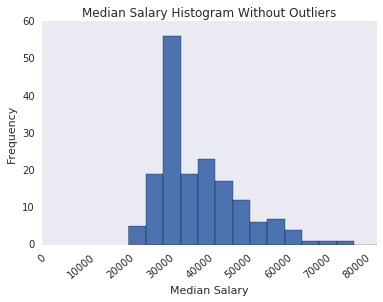

In [16]:
#Create the Median Salary Histogram without the Outliers
ax = recent_grads['Median'].hist(bins=20,xrot=40)

#set axis labels and title and xlim
ax.set_title('Median Salary Histogram Without Outliers')
ax.set_xlabel('Median Salary')
ax.set_ylabel('Frequency')
ax.set_xlim(0,85000)

#remove gridlines
ax.grid(False)

The majority of the median salary falls between $30,000 and $40,000 a year. 

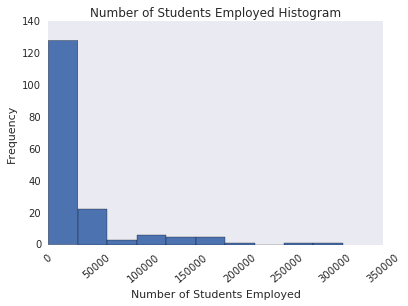

In [17]:
#Create the Employed Histogram 
ax = recent_grads['Employed'].hist(bins=10, 
                                   xrot=40)

#set x and y-axis labels and title
ax.set_title('Number of Students Employed Histogram')
ax.set_xlabel('Number of Students Employed')
ax.set_ylabel('Frequency')

#hide gridlines
ax.grid(False)


Most majors have between 0 - 25,000 employed students. 

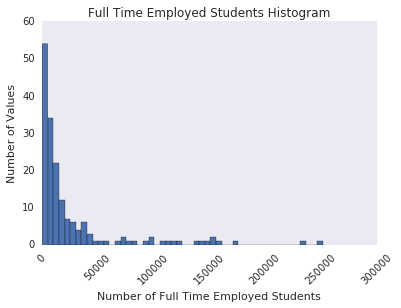

In [18]:
#Create Full Time Employee Histogram 
ax = recent_grads['Full_time'].hist(bins=50,
                                   xrot=45)

#set x and y-axis labels and title
ax.set_xlabel('Number of Full Time Employed Students')
ax.set_ylabel('Number of Values')
ax.set_title('Full Time Employed Students Histogram')

#hide gridlines
ax.grid(False)

- There is a right skewed distribution for the number of full time employed students. Most fall under 25,000 per major. 

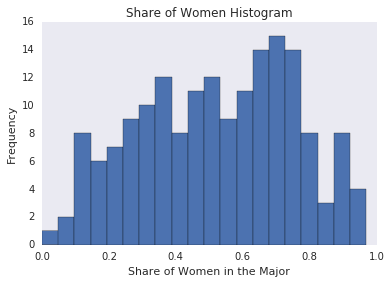

In [19]:
#Create Share Women Histogram 
ax = recent_grads['ShareWomen'].hist(bins=20)

#set x and y-axis labels and title
ax.set_xlabel('Share of Women in the Major')
ax.set_ylabel('Frequency')
ax.set_title('Share of Women Histogram')

#hide gridlines
ax.grid(False)

Most of the majors have 0.6 - 0.8 share of students that identify as women. 

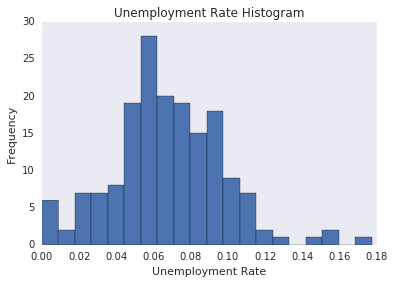

In [20]:
#Create Unemployment Rate Histogram 
ax = recent_grads['Unemployment_rate'].hist(bins=20)

#set x and y-axis labels and title
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Frequency')
ax.set_title('Unemployment Rate Histogram')

#hide gridlines
ax.grid(False)

Majority of the majors fall around the 0.06 unemployment rate. 

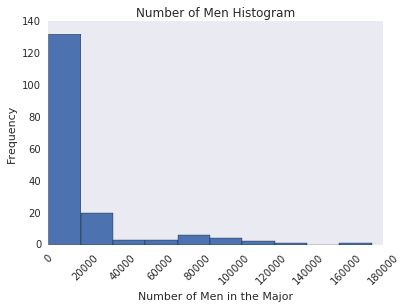

In [21]:
#Create Number of Men Histogram 
ax = recent_grads['Men'].hist(xrot=45)

#set x and y-axis labels and title
ax.set_xlabel('Number of Men in the Major')
ax.set_ylabel('Frequency')
ax.set_title('Number of Men Histogram')

#hide gridlines
ax.grid(False)

Majority of majors have 20,000 men or below. 

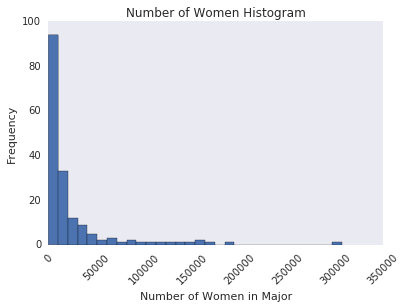

In [22]:
#Create Number of Women Histogram
ax = recent_grads['Women'].hist(bins=30,
                               xrot=45)

#set x and y-axis labels and title
ax.set_xlabel('Number of Women in Major')
ax.set_ylabel('Frequency')
ax.set_title('Number of Women Histogram')

#hide gridlines
ax.grid(False)

## Visualizing Trends with Scatter Matrix Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54cf987b70>,
      dtype=object)

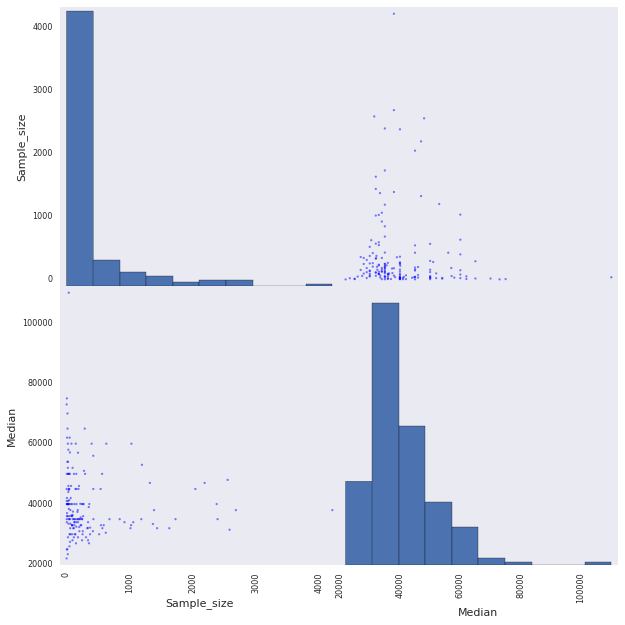

In [23]:
#import the pandas.plotting module
from pandas.plotting import scatter_matrix

#create scatter matrix plot for Sample Size and Median Salary
scatter_matrix(recent_grads[['Sample_size', 'Median']],
              figsize=(10,10))

The Scatter-Matrix plot of Sample Size and Median confirms the congregation of data at less popular majors and the median income of 30k to 40 k. Overall, the popular Major courses expect to have lower maximum Median income than less popular Major subjects.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54cfc88048>,
      dtype=object)

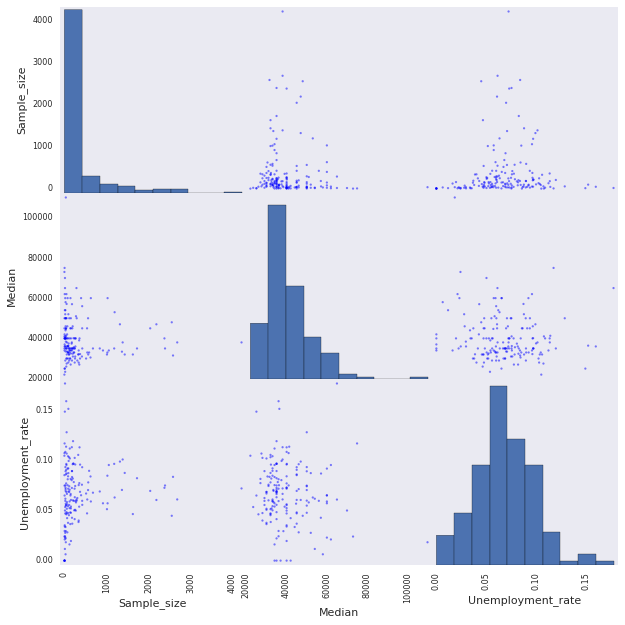

In [24]:
#create scatter matrix plot for Sample Size, Median, and Unemployment
scatter_matrix(recent_grads[['Sample_size','Median', 'Unemployment_rate']],
              figsize=(10,10))

**Observations**

The majors with higher unemployment rates are scarce and have median salaries that range from $40,000 to $80,000. For the majors that are in the 0.05 to 0.10 unemployment rate range, their median salaries are more concentrated bewteen $20,000 - $40,000.

## Visualizing Recent Grad Data with Bar Plots

In this section, I will be creating bar plots for percentages of women, Share_women, and for the unemployment rate, unemployment_rate. Since the dataset is ordered by the Rank column, we can explore the ShareWomen and unemployment_rate based on their rank by median earnings. 


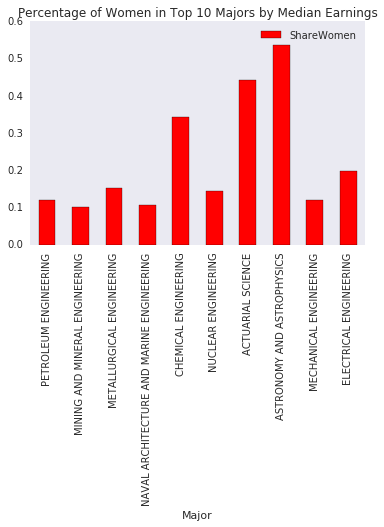

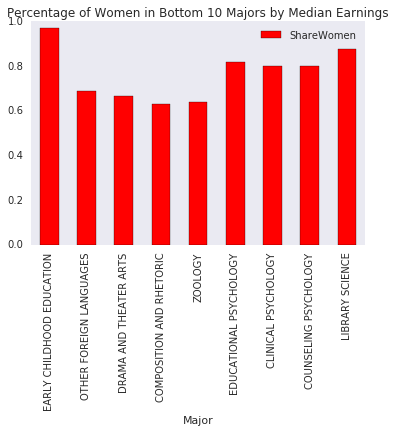

In [25]:
#create bar plot for the percentages of women from the first 10 rows of dataset
ax1 = recent_grads[:10].plot.bar(x='Major',
                                 y='ShareWomen',
                                 color='red')
ax1.set_title('Percentage of Women in Top 10 Majors by Median Earnings')

#create bar plot for the percentages of women from the last 10 rows of dataset
ax2 = recent_grads[163:].plot.bar(x='Major', 
                                  y='ShareWomen',
                                  color='red')
ax2.set_title('Percentage of Women in Bottom 10 Majors by Median Earnings')

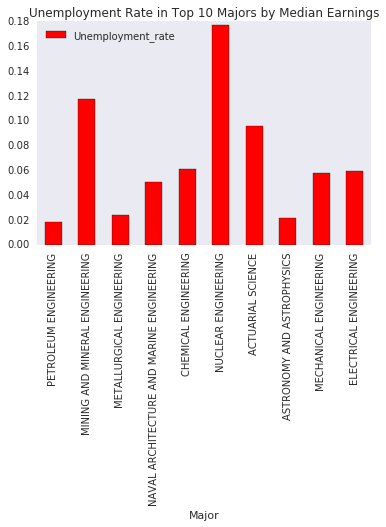

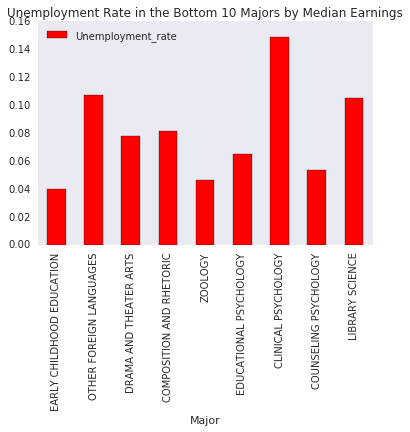

In [26]:
#Create the bar plot for the Unemployment Rates in first 10 rows of dataset
ax1 = recent_grads[:10].plot.bar(x='Major',
                           y='Unemployment_rate',
                           color='red')
ax1.set_title('Unemployment Rate in Top 10 Majors by Median Earnings')


#Create the bar plot for the Unemployment Rates in first 10 rows of dataset
ax2 = recent_grads[163:].plot.bar(x='Major', 
                            y='Unemployment_rate',
                            color='red')
ax2.set_title('Unemployment Rate in the Bottom 10 Majors by Median Earnings')


**Observations:**

- For the top 10 majors ordered by median earnings, in 7 out of 10 majors, ShareWomen is 0.2 or below. For unemployment rate, most, 7 out of 10 majors, are under 0.06. The outliers are *Nuclear Engineering* with an unemployment rate at around 0.18 and *Mining and Mineral Engineering* at around 0.12.

- For the bottom 10 majors by median earnings, **all** of the majors are majority women. This is demonstrative of the gender pay gap. *Early Childhood Education* was the one with the highest percentage of women at around 0.98. For unemployment rate, the rates are on average higher than the top 10 majors by median earnings. The majors with the highest unemployment rates were *Clinical Psychology* and *Other Foreign Languages*.